-----
# cartoGRAPHs - FIGURE 2B
precalculated large networks , e.g. the Interactome

A Notebook to produce 2D and 3D network layouts from any Graph,
including interactive visualization (html files) and export functions 
to import into the VRNetzer analytics platform by Pirch et al.

-----

In [285]:
from cartoGRAPHs import * 

from func_load_data import *
from func_visual_properties import * 
from func_calculations import * 
from func_embed_plot import * 
from func_exportVR import * 

_____
# 1 | DEFINE NETWORK
_____

In [286]:
# ---------------------------------------------------------------------------
#
# PREPROCESSED INFORMATION of organisms e.g. homo sapiens, saccharomyces cerevisiae 
#
# ---------------------------------------------------------------------------
#
# CHOOSE ONE ORGANISM
#
#organism = 'yeast'
organism = 'human'
#
# ---------------------------------------------------------------------------

G = load_graph(organism)

d_centralities = load_centralities(G, organism)
df_centralities = pd.DataFrame(d_centralities).T
df_centralities.columns = ['degree','closeness', 'betweeness', 'eigenvector']
essential_genes,non_ess_genes,notdefined_genes = load_essentiality(G, organism)

d_gene_sym = load_genesymbols(G, organism)
l_features = list(d_gene_sym.values())

# Human specific > to include Disease Ontology
if organism == 'human':
    d_gene_do = pickle.load( open( "input/d_gene_do.pkl", "rb" ) )
    d_do_genes = pickle.load( open( "input/d_do_genes.pkl", "rb" ) )
    d_do_names = pickle.load( open( "input/DO_names.pkl", "rb" ) )
    d_names_do = {y:x for x,y in d_do_names.items()}
else: 
    pass

In [287]:
# ---------------------------------------------------------------------------
#
# PRECALCULATED MATRICES 
# choose one of the following netlayouts (e.g. local,global,importance,..)
#
# ---------------------------------------------------------------------------

netlayout = 'funct-dis' #'local' #'global' #'funct-bio' #'funct-mol' #'funct-cel' #'funct-dis'
DM = load_datamatrix(G,organism, netlayout)
netlayout = 'DM'
Matrix = DM
DM

389289      4524      4353     27127      5925     10735     26259  \
389289  0.000000  0.835970  0.747354  0.000000  0.780911  0.438049  0.000000   
4524    0.835970  0.000000  0.502703  0.835970  0.706513  0.800283  0.835970   
4353    0.747354  0.502703  0.000000  0.747354  0.750917  0.858025  0.747354   
27127   0.000000  0.835970  0.747354  0.000000  0.780911  0.438049  0.000000   
5925    0.780911  0.706513  0.750917  0.780911  0.000000  0.712726  0.780911   
...          ...       ...       ...       ...       ...       ...       ...   
63910   0.833333  0.863308  0.789462  0.833333  0.817426  0.906341  0.833333   
7287    0.951887  0.834270  0.890601  0.951887  0.862968  0.972963  0.951887   
11173   0.855662  0.834270  0.817669  0.855662  0.873509  0.918889  0.855662   
9962    0.845697  0.898759  0.844064  0.845697  0.932388  0.913289  0.845697   
5973    0.938454  0.959619  0.937803  0.938454  0.959548  0.965414  0.938454   

            1029      9649      1630  ...     65125      6787     90678  \
389289  0.807550  0.000000  0.634852  ...  0.916667  0.817426  0.951205   
4524    0.742198  0.835970  0.810332  ...  0.808632  0.850262  0.967985   
4353    0.789306  0.747354  0.830869  ...  0.747354  0.815494  0.963016   
27127   0.807550  0.000000  0.634852  ...  0.916667  0.817426  0.951205   
5925    0.578363  0.780911  0.800000  ...  0.908713  0.920000  0.967929   
...          ...       ...       ...  ...       ...       ...       ...   
63910   0.871700  0.833333  0.939142  ...  0.833333  0.817426  0.902410   
7287    0.907407  0.951887  0.964864  ...  0.879719  0.894591  0.929570   
11173   0.944444  0.855662  0.947295  ...  0.639156  0.841886  0.915485   
9962    0.910913  0.845697  0.943656  ...  0.845697  0.830969  0.909649   
5973    0.976311  0.938454  0.977527  ...  0.907681  0.932580  0.963963   

           10661     56479     63910      7287     11173      9962      5973  
389289  0.894591  0.855662  0.833333  0.951887  0.855662  0.845697  0.938454  
4524    0.896258  0.857946  0.863308  0.834270  0.834270  0.898759  0.959619  
4353    0.920106  0.890601  0.789462  0.890601  0.817669  0.844064  0.937803  
27127   0.894591  0.855662  0.833333  0.951887  0.855662  0.845697  0.938454  
5925    0.930718  0.810263  0.817426  0.862968  0.873509  0.932388  0.959548  
...          ...       ...       ...       ...       ...       ...       ...  
63910   0.789181  0.711325  0.000000  0.903775  0.711325  0.691393  0.876909  
7287    0.939142  0.666667  0.903775  0.000000  0.875000  0.910913  0.964467  
11173   0.817426  0.750000  0.711325  0.875000  0.000000  0.732739  0.840099  
9962    0.804820  0.732739  0.691393  0.910913  0.732739  0.000000  0.886039  
5973    0.922150  0.893400  0.876909  0.964467  0.840099  0.886039  0.000000  

[6538 rows x 6538 columns]

-----
# FIGURE 2B 
-----

## SCALE SPECIFIC DISEASES IN FEATURE MATRIX 
Figure 2B original 

+ DOID:305 - carcinoma
+ DOID:5419 - schizophrenia
+ DOID:423 - myopathy
+ DOID:1612 - breast cancer

In [4]:
scaling_value = 1
netlayout = 'FMscal'+str(scaling_value)

# get Disease Feature Matrix Original
FM_disease = pd.read_csv('input/Features_Disease_Dataframe_'+organism+'.csv', index_col=0)
FM = FM_disease


# first Disease
num_doid_1 = '305' #CARCINOMA
dismod_1 = FM_disease.loc[:,'DOID:'+num_doid_1]
dismod_1.index = FM_disease.index

# second Disease
num_doid_2 = '5419' #SCHIZOPHRENIA
dismod_2 = FM_disease.loc[:,'DOID:'+num_doid_2]
dismod_2.index = FM_disease.index

# third Disease 
num_doid_3 = '423' #MYOPATHY
dismod_3 = FM_disease.loc[:,'DOID:'+num_doid_3]
dismod_3.index = FM_disease.index

# fourth Disease 
num_doid_4 = '1612' #BREAST CANCER
dismod_4 = FM_disease.loc[:,'DOID:'+num_doid_4]
dismod_4.index = FM_disease.index


FM.loc[FM_disease['DOID:'+num_doid_1] !=0, 'DOID:'+num_doid_1] = scaling_value
FM.loc[FM_disease['DOID:'+num_doid_2] !=0, 'DOID:'+num_doid_2] = scaling_value
FM.loc[FM_disease['DOID:'+num_doid_3] !=0, 'DOID:'+num_doid_3] = scaling_value
FM.loc[FM_disease['DOID:'+num_doid_4] !=0, 'DOID:'+num_doid_4] = scaling_value
Matrix = FM
#FM 

_____ 
# 2 | SPATIAL EMBEDDING
_____

### PORTRAIT

In [5]:
%%time 

#posG_tsne2D = layout_portrait_tsne(G,DM,2,prplxty=50, density=1, l_rate=200, steps=250, metric='cosine') 
#posG = posG_tsne2D

nn = 8 # 6
spr = 1
md = 0.75 #0.25
Matrix = DM
#Matrix = FM

posG_umap2D = layout_portrait_umap(G,Matrix,2,n_neighbors=nn, spread=spr, min_dist=md, metric='cosine') 
posG = posG_umap2D

#
# 3D 
#
#posG_tsne3D_ = layout_portrait_tsne(G,Matrix,3,prplxty=10, density=1, l_rate=200, steps=250, metric='cosine') 
#posG = posG_tsne3D

#posG_umap3D = layout_portrait_umap(G,Matrix,3,n_neighbors=20, spread=1, min_dist=0.0, metric='cosine') 
#posG = posG_umap3D

CPU times: user 33.8 s, sys: 2.2 s, total: 36 s
Wall time: 33 s


____________
# 3 | VISUAL SETTINGS + PLOT PREPARATION
____________

### COLORS BASED ON DISEASE MODULES 

In [6]:
#
# DISEASE 1 | ORANGE
#

node_col_1 = '#FF9300' #orange

dismod_genes_1 = [] 
for i,v in enumerate(dismod_1.values):
    if v == 1 or v == scaling_value:
        dismod_genes_1.append(dismod_1.index[i])
    else:
        pass

l_genes_dismod_1 = [str(i) for i in dismod_genes_1]
print('Number of Genes associated to DOID', num_doid_1,':',len(l_genes_dismod_1))

# color edges    
d_edge_col_1 = color_edges_from_nodelist_specific(G, l_genes_dismod_1, node_col_1)

center_dis_1_sym = 'SPRR1A' 

# get nodeID of gene symbol 
for ix, sym in d_gene_sym.items():
    if sym == center_dis_1_sym:
        center_dis_1_id = ix

# get coordinates from nodeID
for node, coords in posG.items():
    if node == center_dis_1_id:
        center_dis_1_coords = coords

# make shapely point from defined center of cluster 
point_1 = geometry.Point(center_dis_1_coords[0], center_dis_1_coords[1])

# create your circle buffer from one of the points
distance = 0.05
circle_buffer = point_1.buffer(distance)

# get list of genes that are within radius around the center 
l_genes_circlebuffer_1 = []
for node,coords in posG.items():
    point = geometry.Point(coords[0], coords[1])
    if point.within(circle_buffer): 
        l_genes_circlebuffer_1.append(node)
        
print('Number of genes within radius around Center - Disease 1:' ,len(l_genes_circlebuffer_1))

# get edges in between nodes within radius around center 

l_links_circlebuffer_1 = []
for edge in G.edges():    
    if edge[0] in l_genes_circlebuffer_1 and edge[1] in l_genes_circlebuffer_1 and edge[0] in l_genes_dismod_1 and edge[1] in l_genes_dismod_1:
        l_links_circlebuffer_1.append(edge)
        
print('Number of links in circle buffer - Disease 1:', len(l_links_circlebuffer_1))

# color edges within circle buffer     
d_edge_col_circlebuffer_1 = color_edges_from_nodelist_specific(G, l_genes_circlebuffer_1, node_col_1)

Number of Genes associated to DOID 305 : 314
Number of genes within radius around Center - Disease 1: 194
Number of links in circle buffer - Disease 1: 10


In [7]:
#
# DISEASE 2 | YELLOW
#

node_col_2 = '#FFC500' #'#ffe700' #yellow

dismod_genes_2 = [] 
for i,v in enumerate(dismod_2.values):
    if v == 1 or v == scaling_value:
        dismod_genes_2.append(dismod_2.index[i])
    else:
        pass
    
l_genes_dismod_2 = [str(i) for i in dismod_genes_2]
print('Number of Genes associated to DOID', num_doid_2,':',len(l_genes_dismod_2))

# color edges 
d_edge_col_2 = color_edges_from_nodelist_specific(G, l_genes_dismod_2, node_col_2)


center_dis_2_sym = 'SLC7A10' 
# get nodeID of gene symbol 
for ix, sym in d_gene_sym.items():
    if sym == center_dis_2_sym:
        center_dis_2_id = ix

# get coordinates from nodeID
for node, coords in posG.items():
    if node == center_dis_2_id:
        center_dis_2_coords = coords

# make shapely point from defined center of cluster 
point_2 = geometry.Point(center_dis_2_coords[0], center_dis_2_coords[1])

# create your circle buffer from one of the points
distance = 0.1
circle_buffer = point_2.buffer(distance)

# get list of genes that are within radius around the center 
l_genes_circlebuffer_2 = []
for node,coords in posG.items():
    point = geometry.Point(coords[0], coords[1])
    if point.within(circle_buffer): 
        l_genes_circlebuffer_2.append(node)
        
print('Number of genes within radius around Center - Disease 2:' ,len(l_genes_circlebuffer_2))

# get edges in between nodes within radius around center 

l_links_circlebuffer_2 = []
for edge in G.edges():    
    if edge[0] in l_genes_circlebuffer_2 and edge[1] in l_genes_circlebuffer_2 and edge[0] in l_genes_dismod_2 and edge[1] in l_genes_dismod_2:
        l_links_circlebuffer_2.append(edge)
        
print('Number of links in circle buffer - Disease 2:', len(l_links_circlebuffer_2))

# color edges within circle buffer     
d_edge_col_circlebuffer_2 = color_edges_from_nodelist_specific(G, l_genes_circlebuffer_2, node_col_2)

Number of Genes associated to DOID 5419 : 973
Number of genes within radius around Center - Disease 2: 277
Number of links in circle buffer - Disease 2: 38


In [8]:
#
# DISEASE 3 | RED 
#

node_col_3 = '#e50000' #red

dismod_genes_3 = [] 
for i,v in enumerate(dismod_3.values):
    if v == 1 or v == scaling_value:
        dismod_genes_3.append(dismod_3.index[i])
    else:
        pass

l_genes_dismod_3 = [str(i) for i in dismod_genes_3]
print('Number of Genes associated to DOID', num_doid_3,':',len(l_genes_dismod_3))

# color edges    
d_edge_col_3 = color_edges_from_nodelist_specific(G, l_genes_dismod_3, node_col_3)

center_dis_3_sym = 'SGCB' 
# get nodeID of gene symbol 
for ix, sym in d_gene_sym.items():
    if sym == center_dis_3_sym:
        center_dis_3_id = ix

# get coordinates from nodeID
for node, coords in posG.items():
    if node == center_dis_3_id:
        center_dis_3_coords = coords

# make shapely point from defined center of cluster 
point_3 = geometry.Point(center_dis_3_coords[0], center_dis_3_coords[1])

# create your circle buffer from one of the points
distance = 0.05
circle_buffer = point_3.buffer(distance)

# get list of genes that are within radius around the center 
l_genes_circlebuffer_3 = []
for node,coords in posG.items():
    point = geometry.Point(coords[0], coords[1])
    if point.within(circle_buffer): 
        l_genes_circlebuffer_3.append(node)
        
print('Number of genes within radius around Center - Disease 2:' ,len(l_genes_circlebuffer_3))

# get edges in between nodes within radius around center 

l_links_circlebuffer_3 = []
for edge in G.edges():    
    if edge[0] in l_genes_circlebuffer_3 and edge[1] in l_genes_circlebuffer_3 and edge[0] in l_genes_dismod_3 and edge[1] in l_genes_dismod_3:
        l_links_circlebuffer_3.append(edge)
        
print('Number of links in circle buffer - Disease 2:', len(l_links_circlebuffer_3))

# color edges within circle buffer     
d_edge_col_circlebuffer_3 = color_edges_from_nodelist_specific(G, l_genes_circlebuffer_3, node_col_3)

Number of Genes associated to DOID 423 : 385
Number of genes within radius around Center - Disease 2: 171
Number of links in circle buffer - Disease 2: 71


In [9]:
#
# DISEASE 4 | DARKRED 
#

node_col_4 = '#a10000' #dark red

dismod_genes_4 = [] 
for i,v in enumerate(dismod_4.values):
    if v == 1 or v == scaling_value:
        dismod_genes_4.append(dismod_4.index[i])
    else:
        pass
    
l_genes_dismod_4 = [str(i) for i in dismod_genes_4]
print('Number of Genes associated to DOID', num_doid_4,':',len(l_genes_dismod_4))

# color edges    
d_edge_col_4 = color_edges_from_nodelist_specific(G, l_genes_dismod_4, node_col_4)

center_dis_4_sym = 'THEMIS2' 
# get nodeID of gene symbol 
for ix, sym in d_gene_sym.items():
    if sym == center_dis_4_sym:
        center_dis_4_id = ix

# get coordinates from nodeID
for node, coords in posG.items():
    if node == center_dis_4_id:
        center_dis_4_coords = coords

# make shapely point from defined center of cluster 
point_4 = geometry.Point(center_dis_4_coords[0], center_dis_4_coords[1])

# create your circle buffer from one of the points
distance = 0.08
circle_buffer = point_4.buffer(distance)

# get list of genes that are within radius around the center 
l_genes_circlebuffer_4 = []
for node,coords in posG.items():
    point = geometry.Point(coords[0], coords[1])
    if point.within(circle_buffer): 
        l_genes_circlebuffer_4.append(node)
        
print('Number of genes within radius around Center - Disease 2:' ,len(l_genes_circlebuffer_4))

# get edges in between nodes within radius around center 

l_links_circlebuffer_4 = []
for edge in G.edges():   
    if edge[0] in l_genes_circlebuffer_4 and edge[1] in l_genes_circlebuffer_4 and edge[0] in l_genes_dismod_4 and edge[1] in l_genes_dismod_4:
        l_links_circlebuffer_4.append(edge)
        
print('Number of links in circle buffer - Disease 2:', len(l_links_circlebuffer_4))

# color edges within circle buffer     
d_edge_col_circlebuffer_4 = color_edges_from_nodelist_specific(G, l_genes_circlebuffer_4, node_col_4)

Number of Genes associated to DOID 1612 : 505
Number of genes within radius around Center - Disease 2: 69
Number of links in circle buffer - Disease 2: 41


In [10]:
# merge all node colors (and sort like G.nodes)
col_param = list(df_centralities['closeness'].values)
d_node_colors = dict(zip(list(G.nodes()), col_param))

c1='#E6E6E6' 
c2='#9B9B9B' 
n=len(set(col_param))

colors_for_palette = []
for x in range(n+1):
    colors_for_palette.append(colorFader(c1,c2,x/n))    

customPalette = sns.set_palette(sns.color_palette(colors_for_palette))
d_colors = color_nodes_from_dict(G, d_node_colors, palette = customPalette)

d_col_all = {}
for k,v in d_colors.items():
        
    if k in l_genes_dismod_4:
        d_col_all[k] = node_col_4
        
    elif k in l_genes_dismod_3:
        d_col_all[k] = node_col_3
        
    elif k in l_genes_dismod_2:
        d_col_all[k] = node_col_2
    
    elif k in l_genes_dismod_1:
        d_col_all[k] = node_col_1
    
    else:
        d_col_all[k]=v
        
colors = list(d_col_all.values())

l_genes_all =  l_genes_dismod_1 + l_genes_dismod_2 + l_genes_dismod_3 + l_genes_dismod_4

## PLOT 

In [14]:
opacity_nodes = 0.8
node_edge_col = '#696969' 
node_linewidth = 0.5

scale_factor = 0.45
size = list(draw_node_degree(G, scale_factor).values())


# plot nodes based on focus > separate to background/foreground 

posG_foreground = {}
posG_background = {}
for k,v in posG.items():
    if k in l_genes_all:
        posG_foreground[k]=v
    else: 
        posG_background[k]=v
    
d_colors_foreground = {}
d_colors_background = {}
for i,c in d_col_all.items():
    if i in posG_foreground.keys():
        d_colors_foreground[i]=c
    else: 
        d_colors_background[i]=c

colors_foreground = list(d_colors_foreground.values())
colors_background = list(d_colors_background.values())

d_feat_foreground = {}
d_feat_background = {}
for k,v in d_gene_sym.items():
    if k in posG_foreground: 
        d_feat_foreground[k]=v
    else:
        d_feat_background[k]=v
        
feat_foreground = list(d_feat_foreground.values())
feat_background = list(d_feat_background.values())

d_size_plotly = draw_node_degree(G, scale_factor/50)  # for zoom screenshots: /50
d_size_plotly_foreground = {}
d_size_plotly_background = {}
for k,v in d_size_plotly.items():
    if k in posG_foreground.keys():
        d_size_plotly_foreground[k]=v
    else:
        d_size_plotly_background[k]=v
        
size_plotly_foreground = list(d_size_plotly_foreground.values())
size_plotly_background = list(d_size_plotly_background.values())


# -----------    
# N O D E S 
# -----------   
umap_nodes_foreground = get_trace_nodes_2D(posG_foreground, feat_foreground, colors_foreground, 
                                           size_plotly_foreground, #3,
                                           node_linewidth, 0.8)
umap_nodes_foreground_ = get_trace_nodes_2D(posG_foreground, feat_foreground, colors_foreground, 2,
                                           None, 0.1)

umap_nodes_background = get_trace_nodes_2D(posG_background, feat_background, colors_background, 
                                           size_plotly_foreground, #3,
                                           node_linewidth, 0.5) 
umap_nodes_background_ = get_trace_nodes_2D(posG_background, feat_background, colors_background, 2, 
                                           None,0.5)
    
# -----------   
# E D G E S 
# -----------  
opac_shine = 0.08
lw_shine = 3.0
lw_buffer = 0.25
opac_buffer = 0.5 
umap_edges_circlebuffer_1 = get_trace_edges_specific2D(d_edge_col_circlebuffer_1,
                                          posG, linew=lw_buffer, opac=opac_buffer)
umap_edges_circlebuffer_1_shine = get_trace_edges_specific2D(d_edge_col_circlebuffer_1,
                                          posG, linew=lw_shine, opac=opac_shine)

umap_edges_circlebuffer_2 = get_trace_edges_specific2D(d_edge_col_circlebuffer_2,
                                          posG, linew=lw_buffer, opac=opac_buffer)
umap_edges_circlebuffer_2_shine = get_trace_edges_specific2D(d_edge_col_circlebuffer_2,
                                          posG, linew=lw_shine, opac=opac_shine)

umap_edges_circlebuffer_3 = get_trace_edges_specific2D(d_edge_col_circlebuffer_3,
                                          posG, linew=lw_buffer, opac=opac_buffer)
umap_edges_circlebuffer_3_shine = get_trace_edges_specific2D(d_edge_col_circlebuffer_3,
                                          posG, linew=lw_shine, opac=opac_shine)

umap_edges_circlebuffer_4 = get_trace_edges_specific2D(d_edge_col_circlebuffer_4,
                                          posG, linew=lw_buffer, opac=opac_buffer)
umap_edges_circlebuffer_4_shine = get_trace_edges_specific2D(d_edge_col_circlebuffer_4,
                                          posG, linew=lw_shine, opac=opac_shine)

opacity_edges = 0.09
width_edges = 0.25
umap_edges_1 = get_trace_edges_specific2D(d_edge_col_1, 
                                          posG, linew=width_edges, opac=opacity_edges)
umap_edges_2 = get_trace_edges_specific2D(d_edge_col_2, 
                                          posG, linew=width_edges, opac=opacity_edges)
umap_edges_3 = get_trace_edges_specific2D(d_edge_col_3,
                                          posG, linew=width_edges, opac=opacity_edges)
umap_edges_4 = get_trace_edges_specific2D(d_edge_col_4, 
                                          posG, linew=width_edges, opac=opacity_edges)
                                         
data = [
        umap_nodes_background_, 
        umap_nodes_background, 
        
        # all edges 
        umap_edges_1, 
        umap_edges_2,
        umap_edges_3,
        umap_edges_4,
    
        # edges within radius
        umap_edges_circlebuffer_1_shine,
        umap_edges_circlebuffer_2_shine,
        umap_edges_circlebuffer_3_shine,
        umap_edges_circlebuffer_4_shine,
    
        umap_edges_circlebuffer_1, 
        umap_edges_circlebuffer_2, 
        umap_edges_circlebuffer_3, 
        umap_edges_circlebuffer_4, 
        
        
        umap_nodes_foreground_,
        umap_nodes_foreground]



if len(list(posG.values())[0]) == 2:
    path = 'output_plots/2Dlayouts/'
    schema = 'light' #'dark' 
    fname = 'FIG2B_2Dportrait_DOID'+num_doid_1+'_'+num_doid_2+'_'+num_doid_3+'_'+num_doid_4+'_'+netlayout+'_nn'+str(nn)+'_spr'+str(spr)+'_md'+str(md)+'_'+organism
    fname_withlinks = 'FIG2B_2Dportrait_DOID'+num_doid_1+'_'+num_doid_2+'_'+num_doid_3+'_'+num_doid_4+'_'+netlayout+'_nn'+str(nn)+'_spr'+str(spr)+'_md'+str(md)+'_'+organism+'_links'

    plot_2D(data,path,fname)

elif len(list(posG.values())[0]) == 3:
    path = 'output_plots/3Dlayouts/'
    schema = 'light' #'dark' 
    fname = 'FIG2B_3Dportrait_DOID'+num_doid_1+'_'+num_doid_2+'_'+num_doid_3+'_'+num_doid_4+'_'+netlayout+'_nn'+str(nn)+'_spr'+str(spr)+'_md'+str(md)+'_'+organism
    fname_withlinks = 'FIG2B_3Dportrait_DOID'+num_doid_1+'_'+num_doid_2+'_'+num_doid_3+'_'+num_doid_4+'_'+netlayout+'_nn'+str(nn)+'_spr'+str(spr)+'_md'+str(md)+'_'+organism+'_links'

    plot_3D(data,path,fname, schema)

# PLEIOTROPY DIAGRAM

#### COLORS BASED ON GRADIENT OF PLEIOTROPY / DISEASE COUNT 

In [ ]:
DM_feature = pd.read_csv('input/Features_Disease_Dataframe_Human.csv', index_col=0)

# set gene list (= G.nodes())
genes_assoc = []
for i in DM_feature.index:
    genes_assoc.append(str(i))

genes_notassoc = [] 
for g in G.nodes():
    if g not in genes_assoc:
        genes_notassoc.append(g)

features_counted = (DM_feature == 1).astype(int).sum(axis=1)
d_features_counted = dict(zip(genes_assoc, list(features_counted)))
    
d_rest = {}
for i in genes_notassoc: 
    d_rest[i] = 0

d_param_unsorted = {**d_features_counted, **d_rest}
d_diseasecount = {key:d_param_unsorted[key] for key in G.nodes()}

d_nodecolors = d_diseasecount
col_pal = 'BuPu' # 'crest' #'rocket_r' #'viridis_r' #'YlOrRd'

d_col_all = color_nodes_from_dict(G, d_nodecolors, palette = col_pal)
colors = list(d_colors.values())

d_diseasecount_sortbyvalue = dict(sorted(d_diseasecount.items(), key=lambda item: item[1], reverse=True))
diseasecount_foreground = list(d_diseasecount_sortbyvalue.keys())[:1000]
l_genes_all = diseasecount_foreground

## PLOT 

In [17]:
opacity_nodes = 0.8
node_edge_col = '#696969' 
node_linewidth = 0.25

scale_factor = 0.45
size = list(draw_node_degree(G, scale_factor).values())

opacity_edges = 0.05
width_edges = 0.25

# plot nodes based on focus > separate to background/foreground 

posG_foreground = {}
posG_background = {}
for k,v in posG.items():
    if k in l_genes_all:
        posG_foreground[k]=v
    else: 
        posG_background[k]=v
    
d_colors_foreground = {}
d_colors_background = {}
for i,c in d_col_all.items():
    if i in posG_foreground.keys():
        d_colors_foreground[i]=c
    else: 
        d_colors_background[i]=c

colors_foreground = list(d_colors_foreground.values())
colors_background = list(d_colors_background.values())

d_feat_foreground = {}
d_feat_background = {}
for k,v in d_gene_sym.items():
    if k in posG_foreground: 
        d_feat_foreground[k]=v
    else:
        d_feat_background[k]=v
        
feat_foreground = list(d_feat_foreground.values())
feat_background = list(d_feat_background.values())

d_size_plotly = draw_node_degree(G, scale_factor/75)  # for zoom screenshots: /50
d_size_plotly_foreground = {}
d_size_plotly_background = {}
for k,v in d_size_plotly.items():
    if k in posG_foreground.keys():
        d_size_plotly_foreground[k]=v
    else:
        d_size_plotly_background[k]=v
        
size_plotly_foreground = list(d_size_plotly_foreground.values())
size_plotly_background = list(d_size_plotly_background.values())


umap_nodes_foreground = get_trace_nodes_2D(posG_foreground, feat_foreground, colors_foreground, 
                                           3, #size_plotly_foreground, #3,
                                           node_linewidth, #*0.25, 
                                           0.8)
umap_nodes_foreground_ = get_trace_nodes_2D(posG_foreground, feat_foreground, colors_foreground, 
                                           5, #2, 
                                            None, 0.2)
umap_nodes_background = get_trace_nodes_2D(posG_background, feat_background, colors_background, 
                                            3, #size_plotly_foreground, #3,
                                           node_linewidth,
                                           0.5) 
umap_nodes_background_ = get_trace_nodes_2D(posG_background, feat_background, colors_background, 
                                           5, #2, 
                                            None,0.2)
    
umap_edges_1 = get_trace_edges_specific2D(d_edge_col_1, 
                                          #posG, linew=width_edges, opac=opacity_edges)
                                          posG, linew=0.25, opac=0.05)

umap_edges_2 = get_trace_edges_specific2D(d_edge_col_2, 
                                          #posG, linew=width_edges,opac=opacity_edges)
                                          posG, linew=0.25, opac=0.05)

umap_edges_3 = get_trace_edges_specific2D(d_edge_col_3,
                                          #posG, linew=width_edges, opac=opacity_edges)
                                          posG, linew=0.25, opac=0.05)

umap_edges_4 = get_trace_edges_specific2D(d_edge_col_4, 
                                          #posG, linew=width_edges, opac=opacity_edges)
                                          posG, linew=0.25, opac=0.05)

data = [
        umap_nodes_background_, 
        umap_nodes_background, 
        
        #umap_edges_1, 
        #umap_edges_2,
        #umap_edges_3,
        #umap_edges_4,
        
        umap_nodes_foreground_,
        umap_nodes_foreground]



if len(list(posG.values())[0]) == 2:
    path = 'output_plots/2Dlayouts/'
    schema = 'light' #'dark' 
    fname_pleio = 'FIG2B_2Dportrait_DOID'+num_doid_1+'_'+num_doid_2+'_'+num_doid_3+'_'+num_doid_4+'_'+netlayout+'_nn'+str(nn)+'_spr'+str(spr)+'_md'+str(md)+'_'+organism+'_pleiotropy'

    plot_2D(data,path,fname_pleio)

elif len(list(posG.values())[0]) == 3:
    path = 'output_plots/3Dlayouts/'
    schema = 'light' #'dark' 
    fname_pleio = 'FIG2B_3Dportrait_DOID'+num_doid_1+'_'+num_doid_2+'_'+num_doid_3+'_'+num_doid_4+'_'+netlayout+'_nn'+str(nn)+'_spr'+str(spr)+'_md'+str(md)+'_'+organism+'_pleiotropy'


    plot_3D(data,path,fname_pleio)

# DAB1 - in numbers 

### DAB1 and related diseases

In [82]:
dab_gene_diseases = d_gene_do[dab_sym]
dab_gene_disease_names = {}

for k,v in d_do_names.items():
    for d in dab_gene_diseases:
        if k == d: 
            dab_gene_disease_names[d]=v
            
print('DAB1 is associated with', len(dab_gene_diseases), 'diseases.')
print('It is known to be related to:', *list(dab_gene_disease_names.values()), sep = '\n')

DAB1 is associated with 6 diseases.
It is known to be related to:
developmental disorder of mental health
pervasive developmental disorder
autism spectrum disorder
autistic disorder
disease of mental health
disease


### DAB1 neighbors and related diseases

In [87]:
dab_gene = {} 

for k,v in d_gene_sym.items():
    if 'DAB1' in v:
        dab_gene[k]=v
        
dab_neighbors = [n for n in G.neighbors(str(*dab_gene.keys()))]
dab_sym = str(*dab_gene.keys())
dab_id = str(*dab_gene.values())

print('DAB1 has', len(dab_neighbors), 'neighbors.')

DAB1 has 80 neighbors.


In [132]:
dab_neighbors_diseases = {}

for k,v in d_gene_do.items():
    for d in dab_neighbors:
        if k == d:
            dab_neighbors_diseases[d]=v
print('Dab1 neighbors, which have disease associations: ',len(dab_neighbors_diseases))

Dab1 neighbors, which have disease associations:  38


In [398]:
# Idenfying the neighborhood disease associations of Dab1

dab_neighbors_disease_names = {}

all_disease_names = []
for k,v in dab_neighbors_diseases.items():
    new = []
    for doid in v:
        for dis,nam in d_do_names.items():
            if doid == dis:
                new.append((dis,nam))
                all_disease_names.append(nam)
            dab_neighbors_disease_names[k] = new
print('Number of diseases with Dab1 neighbors association:', len(set(all_disease_names)))

# counting how often one disease can be found in the list
from collections import Counter 
disease_counts = dict(Counter(all_disease_names))
disease_counts_sorted = dict(sorted(disease_counts.items(), key=lambda item: item[1], reverse=True))

Number of diseases with Dab1 neighbors association: 770


In [392]:
#val_breast = disease_counts_sorted['breast cancer']
#val_schizo = disease_counts_sorted['schizophrenia']

for i,(k,v) in enumerate(disease_counts_sorted.items()):
    if k == 'breast cancer':
        id_breast = i 
        val_breast = k
    elif k == 'schizophrenia':
        id_schizo = i
        val_schizo = k
    else:
        pass

In [393]:
col_list = []
for k,v in disease_counts_sorted.items():
    if k == 'breast cancer' or k == 'schizophrenia':
        col_list.append('orangered')
    else:
        col_list.append('lightgrey')

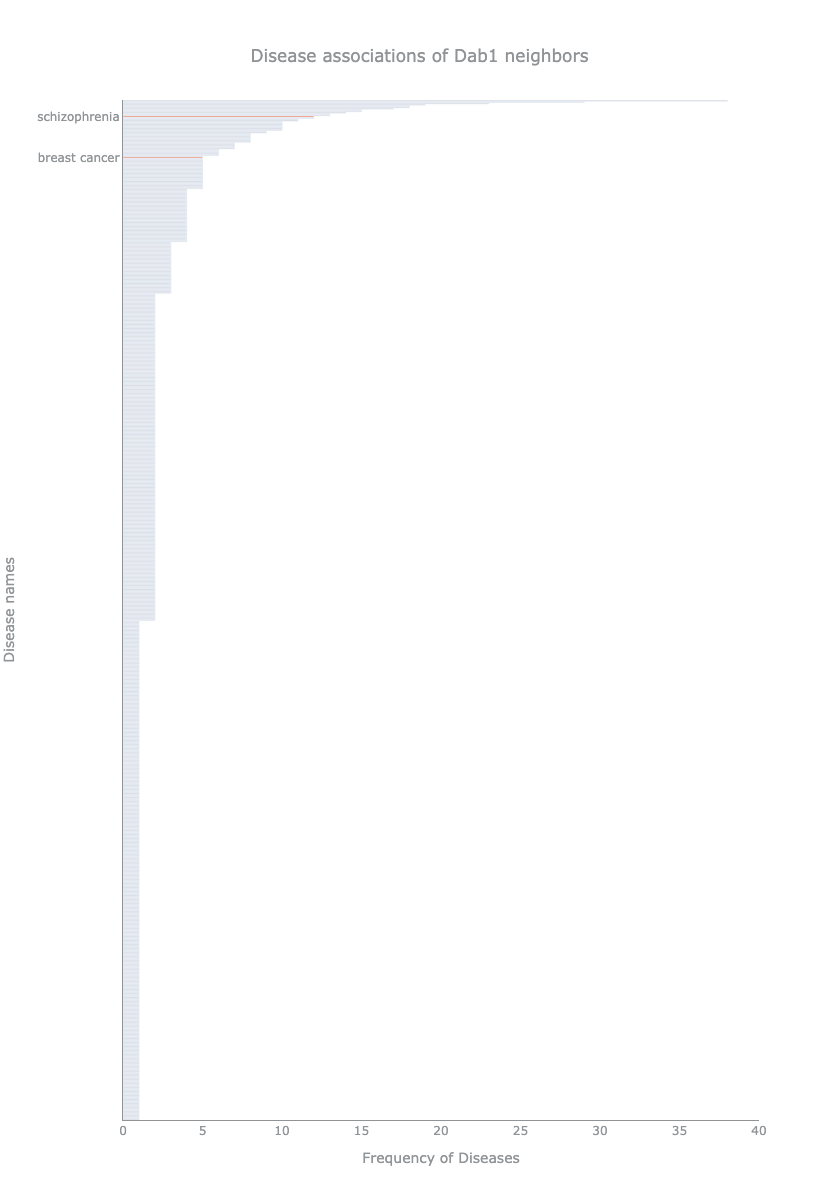

In [394]:
fig = pgo.Figure()

fig.add_trace(pgo.Bar(y = list(disease_counts_sorted.keys()),
                    x = list(disease_counts_sorted.values()),
                    orientation = "h",
                      marker=dict(color = col_list),
                     )
             )

fig.update_layout(width=800,
                    height=1200,
                    plot_bgcolor = "white",
                    font = dict(color = "#909497"),
                    title = {'text':'Disease associations of Dab1 neighbors',
                            'x':0.5,
                            'yanchor': 'top'},
                    xaxis = dict(title = "Frequency of Diseases", linecolor = "#909497"),
                    yaxis = dict(title = "Disease names", linecolor = "#909497",
                                tickmode = 'array',
                                tickvals = [id_breast, id_schizo],
                                ticktext = [val_breast, val_schizo],
                                )
                 )
#fig['layout']['xaxis']['autorange'] = "reversed"
fig['layout']['yaxis']['autorange'] = "reversed"

fig.show()

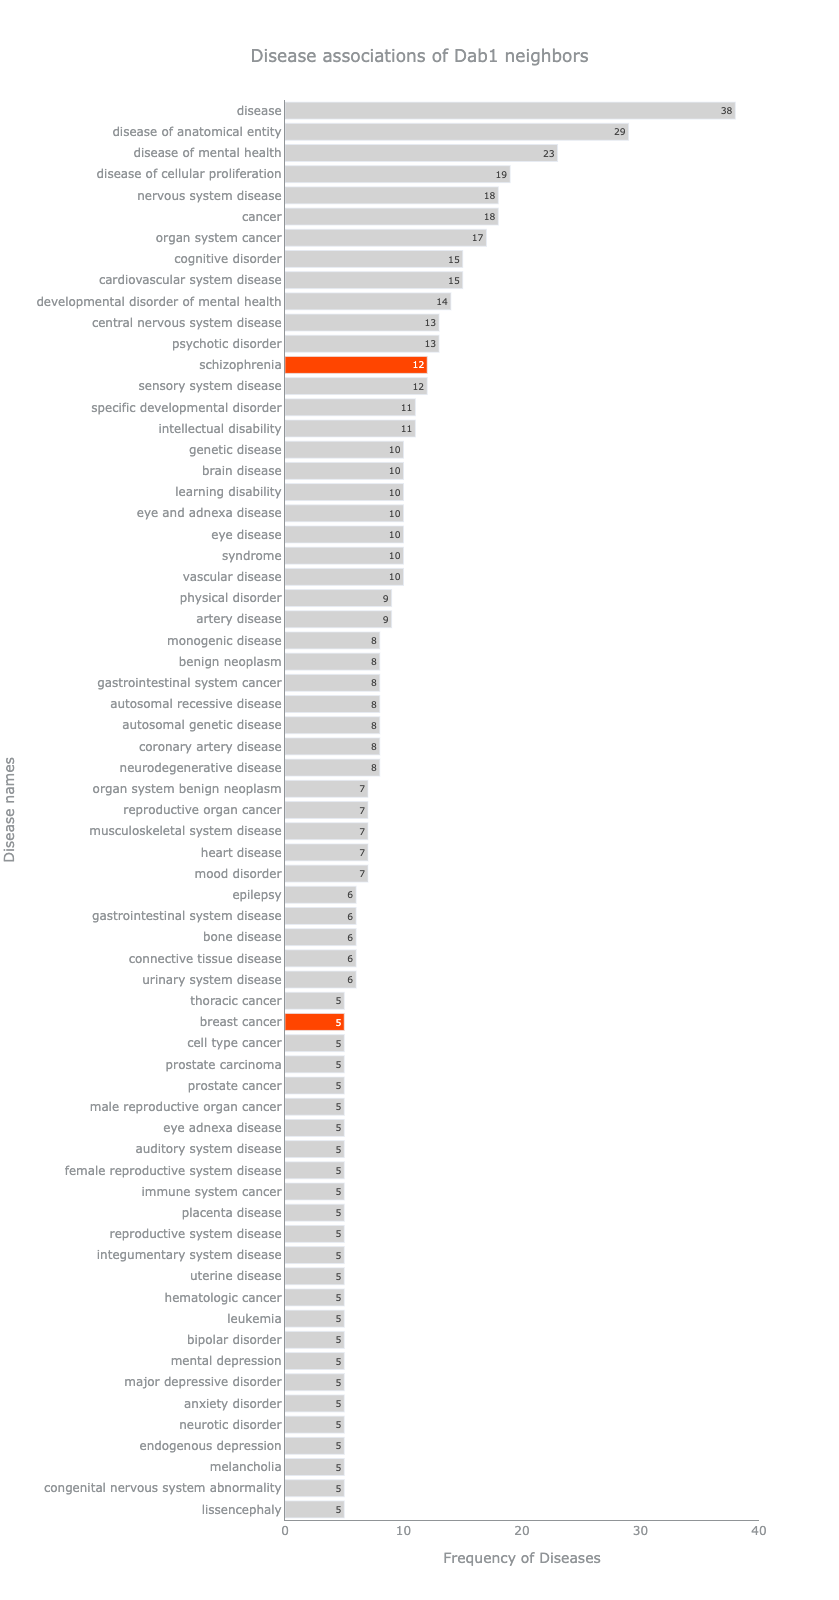

In [413]:
disease_counts_sorted_cut = {}
for k,v in disease_counts_sorted.items():
    if v >= 5:
        disease_counts_sorted_cut[k]=v
    else:
        pass
    
fig = pgo.Figure()

fig.add_trace(pgo.Bar(y = list(disease_counts_sorted_cut.keys()),
                    x = list(disease_counts_sorted_cut.values()),
                    orientation = "h",
                    marker=dict(color = col_list),
                    texttemplate=list(disease_counts_sorted.values()),
                    textposition="inside",
                    textangle=0,
                     )
             )

fig.update_layout(width=800,
                    height=1600,
                    plot_bgcolor = "white",
                    font = dict(color = "#909497"),
                    title = {'text':'Disease associations of Dab1 neighbors',
                            'x':0.5,
                            'yanchor': 'top'},
                    xaxis = dict(title = "Frequency of Diseases", linecolor = "#909497"), #type="log"),
                    yaxis = dict(title = "Disease names", linecolor = "#909497")
                 )
#fig['layout']['xaxis']['autorange'] = "reversed"
fig['layout']['yaxis']['autorange'] = "reversed"

fig.show()

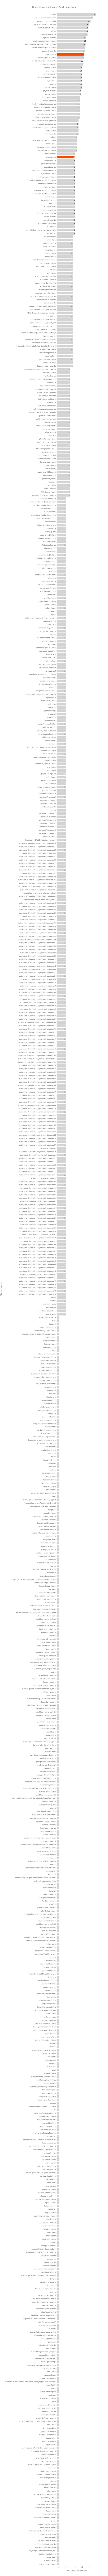

In [409]:
fig = pgo.Figure()

fig.add_trace(pgo.Bar(y = list(disease_counts_sorted.keys()),
                    x = list(disease_counts_sorted.values()),
                    orientation = "h",
                    marker=dict(color = col_list),
                    texttemplate=list(disease_counts_sorted.values()),
                    textposition="inside",
                     )
             )

fig.update_layout(width=800,
                    height=20000,
                    plot_bgcolor = "white",
                    font = dict(color = "#909497"),
                    title = {'text':'Disease associations of Dab1 neighbors',
                            'x':0.5,
                            'yanchor': 'top'},
                    xaxis = dict(title = "Frequency of Diseases", linecolor = "#909497",type="log"),
                    yaxis = dict(title = "Disease names", linecolor = "#909497",
                                #tickmode = 'array',
                                #tickvals = [id_breast, id_schizo],
                                #ticktext = [val_breast, val_schizo],
                                )
                 )
#fig['layout']['xaxis']['autorange'] = "reversed"
fig['layout']['yaxis']['autorange'] = "reversed"

fig.show()

-----
# NEUROFIBROMATOSIS
-----

## SCALE SPECIFIC DISEASES IN FEATURE MATRIX 

Figure 2B Suppl. 

+ DOID:3165 - Skin benign neoplasm
+ DOID:10534 - Stomach Cancer
+ DOID:3620 - Central Nervous System Cancer
+ DOID:00660089 - Endocrine Organ benign neoplasm

In [ ]:
# get Disease Feature Matrix Original
FM_disease = pd.read_csv('input/Features_Disease_Dataframe_'+organism+'.csv', index_col=0)
FM = FM_disease
FM

In [ ]:
scaling_value = 2
netlayout = 'FMscal'+str(scaling_value)

# first Disease
num_doid_1 = '3165'
dismod_1 = FM_disease.loc[:,'DOID:'+num_doid_1]
dismod_1.index = FM_disease.index

# second Disease
num_doid_2 = '10534' #'3883' #'1612' #'3490'
dismod_2 = FM_disease.loc[:,'DOID:'+num_doid_2]
dismod_2.index = FM_disease.index

# third Disease 
num_doid_3 = '3620' #'0060115' 
dismod_3 = FM_disease.loc[:,'DOID:'+num_doid_3]
dismod_3.index = FM_disease.index

# fourth Disease 
num_doid_4 = '0060089'
dismod_4 = FM_disease.loc[:,'DOID:'+num_doid_4]
dismod_4.index = FM_disease.index


FM.loc[FM_disease['DOID:'+num_doid_1] != 0, 'DOID:'+num_doid_1] = scaling_value
FM.loc[FM_disease['DOID:'+num_doid_2] != 0, 'DOID:'+num_doid_2] = scaling_value
FM.loc[FM_disease['DOID:'+num_doid_3] != 0, 'DOID:'+num_doid_3] = scaling_value
FM.loc[FM_disease['DOID:'+num_doid_4] != 0, 'DOID:'+num_doid_4] = scaling_value
FM

## DISEASES

In [ ]:
node_col_1 = '#ff9a00' #orange
node_col_2 = '#ffe700' #yellow
node_col_3 = '#e50000' #red
node_col_4 = '#a10000' #dark red

#
# DISEASE 1
#
dismod_genes_1 = [] 
for i,v in enumerate(dismod_1.values):
    if v == 1 or v == scaling_value:
        dismod_genes_1.append(dismod_1.index[i])
    else:
        pass

l_genes_dismod_1 = [str(i) for i in dismod_genes_1]
print('Number of Genes associated to DOID', num_doid_1,':',len(l_genes_dismod_1))

# color edges    
d_edge_col_1 = color_edges_from_nodelist_specific(G, l_genes_dismod_1, node_col_1)


#
# DISEASE 2
#
dismod_genes_2 = [] 
for i,v in enumerate(dismod_2.values):
    if v == 1 or v == scaling_value:
        dismod_genes_2.append(dismod_2.index[i])
    else:
        pass
    
l_genes_dismod_2 = [str(i) for i in dismod_genes_2]
print('Number of Genes associated to DOID', num_doid_2,':',len(l_genes_dismod_2))

# color edges 
d_edge_col_2 = color_edges_from_nodelist_specific(G, l_genes_dismod_2, node_col_2)


#
# DISEASE 3
#
dismod_genes_3 = [] 
for i,v in enumerate(dismod_3.values):
    if v == 1 or v == scaling_value:
        dismod_genes_3.append(dismod_3.index[i])
    else:
        pass

l_genes_dismod_3 = [str(i) for i in dismod_genes_3]
print('Number of Genes associated to DOID', num_doid_3,':',len(l_genes_dismod_3))

# color edges    
d_edge_col_3 = color_edges_from_nodelist_specific(G, l_genes_dismod_3_with, node_col_3)


#
# DISEASE 4 
#
dismod_genes_4 = [] 
for i,v in enumerate(dismod_4.values):
    if v == 1 or v == scaling_value:
        dismod_genes_4.append(dismod_4.index[i])
    else:
        pass
    
l_genes_dismod_4 = [str(i) for i in dismod_genes_4]
print('Number of Genes associated to DOID', num_doid_4,':',len(l_genes_dismod_4))

# color edges    
d_edge_col_4 = color_edges_from_nodelist_specific(G, l_genes_dismod_4_with, node_col_4)

## NF + neighbors 

In [ ]:
path_nf = 'input/neurofibromatosis/'

# gene of interest
nf_goi_ = str(int(np.loadtxt(path_nf+'nf_gene_of_interest.txt', unpack=False)))
nf_goi = list(nf_goi_.split(" "))
nf_goi_str = ' '.join([str(item) for item in nf_goi])

nf_neighbors = []
for edge in G.edges():
    if edge[0] == nf_goi_str:
        nf_neighbors.append(edge[1])
    elif edge[1] == nf_goi_str: 
        nf_neighbors.append(edge[0])
        
l_genes_dismod_with = nf_goi + nf_neighbors
print('Number of Genes of NF1 + neighbors:', len(l_genes_dismod_with))

node_col_dismod = '#00D9FC' #'#008792' #'#00E3DF' #'#FF8E00' 
d_edge_col_dismod= color_edges_from_node(G, l_genes_dismod, node_col_dismod)
print('Links of DOID 8712 genes:',len(d_edge_col_dismod))

d_edge_col_dismod_with = color_edges_from_nodelist_specific(G, l_genes_dismod_with, node_col_dismod)
print('Links of DOID 8712 genes:',len(d_edge_col_dismod_with))

### 2D PORTRAIT

In [ ]:
%%time 

#posG_tsne2D = layout_portrait_tsne(G,DM,2,prplxty=50, density=1, l_rate=200, steps=250, metric='cosine') 
#posG = posG_tsne2D

posG_umap2D = layout_portrait_umap(G,FM,2,n_neighbors=8, spread=3, min_dist=0.4, metric='cosine')  #layout_portrait_umap(G,DM,2,n_neighbors=8, spread=6, min_dist=0.9, metric='cosine') 
posG = posG_umap2D

____________
# 3 | VISUAL SETTINGS + PLOT PREPARATION
____________

In [ ]:
opacity_nodes = 0.8
node_edge_col = '#696969' 
node_linewidth = 0.1

scale_factor = 0.55
size = list(draw_node_degree(G, scale_factor).values())

scale_factor3D = 0.025
size3d = list(draw_node_degree_3D(G, scale_factor3D).values())

nodesglow_diameter = 8.0
nodesglow_transparency = 0.01 # 0.01

opacity_edges = 0.05
width = 0.1

width_edges = 0.25
opacity_edges = 0.5

In [ ]:
# merge all node colors (and sort like G.nodes)

col_param = list(df_centralities['closeness'].values)
d_node_colors = dict(zip(list(G.nodes()), col_param))

c1='#E6E6E6' 
c2='#9B9B9B' 
n=len(set(col_param))

colors_for_palette = []
for x in range(n+1):
    colors_for_palette.append(colorFader(c1,c2,x/n))    

customPalette = sns.set_palette(sns.color_palette(colors_for_palette))
d_colors = color_nodes_from_dict(G, d_node_colors, palette = customPalette)

d_col_all = {}
for k,v in d_colors.items():
    
    # color for all NF1 associated genes (i.e. neighbors, NF1 disease module) 
    if k in l_genes_dismod or k in nf_neighbors:
        d_col_all[k] = node_col_dismod

    # disease module colors 
    elif k in l_genes_dismod_1:
        d_col_all[k] = node_col_1
        
    elif k in l_genes_dismod_2:
        d_col_all[k] = node_col_2
        
    elif k in l_genes_dismod_3:
        d_col_all[k] = node_col_3
    
    elif k in l_genes_dismod_4:
        d_col_all[k] = node_col_4
    
    else:
        d_col_all[k]=v
        
colors = list(d_col_all.values())

In [ ]:
l_genes_all = l_genes_dismod_1 + l_genes_dismod_2 + l_genes_dismod_3 + l_genes_dismod_4 + nf_goi + nf_neighbors 

# plot nodes based on focus > separate to background/foreground 

posG_foreground = {}
posG_background = {}
for k,v in posG.items():
    if k in l_genes_all:
        posG_foreground[k]=v
    else: 
        posG_background[k]=v
    
d_colors_foreground = {}
d_colors_background = {}
for i,c in d_col_all.items():
    if i in posG_foreground.keys():
        d_colors_foreground[i]=c
    else: 
        d_colors_background[i]=c

colors_foreground = list(d_colors_foreground.values())
colors_background = list(d_colors_background.values())

d_feat_foreground = {}
d_feat_background = {}
for k,v in d_gene_sym.items():
    if k in posG_foreground: 
        d_feat_foreground[k]=v
    else:
        d_feat_background[k]=v
        
feat_foreground = list(d_feat_foreground.values())
feat_background = list(d_feat_background.values())

d_size_plotly = draw_node_degree(G, scale_factor/100)
d_size_plotly_foreground = {}
d_size_plotly_background = {}
for k,v in d_size_plotly.items():
    if k in posG_foreground.keys():
        d_size_plotly_foreground[k]=v
    else:
        d_size_plotly_background[k]=v
        
size_plotly_foreground = list(d_size_plotly_foreground.values())
size_plotly_background = list(d_size_plotly_background.values())


umap_nodes_foreground = get_trace_nodes_2D(posG_foreground, feat_foreground, colors_foreground, size_plotly_foreground, 
                                           node_linewidth*0.25, 0.8)
umap_nodes_foreground_ = get_trace_nodes_2D(posG_foreground, feat_foreground, colors_foreground, 5,
                                           None, 0.15)
umap_nodes_background = get_trace_nodes_2D(posG_background, feat_background, colors_background, size_plotly_background, 
                                           None,0.5) 
umap_nodes_background_ = get_trace_nodes_2D(posG_background, feat_background, colors_background, 2, 
                                           None,0.5)


umap_edges_1 = get_trace_edges_specific2D(d_edge_col_1, 
                                          posG, linew=width_edges, opac=opacity_edges)
                                          #posG, linew=0.45, opac=0.55)

umap_edges_2 = get_trace_edges_specific2D(d_edge_col_2, 
                                          posG, linew=width_edges,opac=opacity_edges)
                                          #posG, linew=0.45, opac=0.55)

umap_edges_3 = get_trace_edges_specific2D(d_edge_col_3,
                                          posG, linew=width_edges, opac=opacity_edges)
                                          #posG, linew=0.45, opac=0.55)

umap_edges_4 = get_trace_edges_specific2D(d_edge_col_4, 
                                          posG, linew=width_edges, opac=opacity_edges)
                                          #posG, linew=0.45, opac=0.55)

data = [
        umap_nodes_background_, 
        umap_nodes_background, 
    
        #umap_edges_1, 
        #umap_edges_2,
        umap_edges_3,
        #umap_edges_4,
        
        umap_nodes_foreground_,
        umap_nodes_foreground]

#### PLOT NETWORK PORTRAIT

In [ ]:
if len(list(posG.values())[0]) == 2:
    path = 'output_plots/2Dlayouts/'
    schema = 'light' #'dark' 
    fname = '2Dportrait_DOID'+num_doid_1+'_'+num_doid_2+'_'+num_doid_3+'_'+num_doid_4+'_'+netlayout+'_'+organism+'_'+schema

    plot_2D(data,path,fname)

elif len(list(posG.values())[0]) == 3:
    path = 'output_plots/3Dlayouts/'
    schema = 'light' #'dark' 
    fname = '3Dportrait_DOID'+num_doid_1+'_'+num_doid_2+'_'+num_doid_3+'_'+num_doid_4+'_'+netlayout+'_'+organism+'_'+schema

    plot_3D(data,path,fname, schema)